<p style="text-align:center">
    <a href="https://skills.network" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>


# **Box Plots**


Estimated time needed: **45** minutes


In this lab, you will focus on the visualization of data. The dataset will be provided through an RDBMS, and you will need to use SQL queries to extract the required data.


## Objectives


In this lab you will perform the following:


-   Visualize the distribution of data.

-   Visualize the relationship between two features.

-   Visualize data composition and comparisons using box plots.


### Setup: Connecting to the Database


#### 1. Download the Database File


In [1]:
!wget https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/QR9YeprUYhOoLafzlLspAw/survey-results-public.sqlite

--2025-05-27 21:19:35--  https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/QR9YeprUYhOoLafzlLspAw/survey-results-public.sqlite
Resolving cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)... 169.63.118.104
Connecting to cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)|169.63.118.104|:443... connected.
200 OKequest sent, awaiting response... 
Length: 211415040 (202M) [application/octet-stream]
Saving to: ‘survey-results-public.sqlite’

survey-results-publ 100%[===================>] 201.62M  55.5MB/s    in 3.6s    

2025-05-27 21:19:41 (55.8 MB/s) - ‘survey-results-public.sqlite’ saved [211415040/211415040]



#### 2. Connect to the Database


**Install the needed libraries**


In [1]:
!pip install pandas
!pip install matplotlib
!pip install seaborn
!pip install numpy
!pip install scikit-learn

import sqlite3
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sn

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.7/12.7 MB 134.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.5/16.5 MB 184.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.6/8.6 MB 94.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.9/4.9 MB 79.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.5/1.5 MB 29.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.6/4.6 MB 83.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.1/13.1 MB 128.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 37.3/37.3 MB 141.0 MB/s eta 0:00:0000:01


In [3]:
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt

In [4]:
conn = sqlite3.connect('survey-data.sqlite')

## Demo: Basic SQL Queries


#### Demo 1: Count the Number of Rows in the Table


In [ ]:
QUERY = "SELECT COUNT(*) FROM main"
df = pd.read_sql_query(QUERY, conn)
print(df)


#### Demo 2: List All Tables


In [ ]:
QUERY = """
SELECT name as Table_Name 
FROM sqlite_master 
WHERE type = 'table'
"""
pd.read_sql_query(QUERY, conn)


#### Demo 3: Group Data by Age


In [ ]:
QUERY = """
SELECT Age, COUNT(*) as count 
FROM main 
GROUP BY Age 
ORDER BY Age
"""
df_age = pd.read_sql_query(QUERY, conn)
print(df_age)


## Visualizing Data


### Task 1: Visualizing the Distribution of Data


**1. Box Plot of `CompTotal` (Total Compensation)**


Use a box plot to analyze the distribution and outliers in total compensation.


In [6]:
import os
print(os.listdir('.'))

['.ipynb_checkpoints', 'Lab 15 Box Plot.ipynb', 'cleaned_stackoverflow_survey.csv', 'survey-results-public.sqlite', 'survey-data.sqlite']


In [2]:
import pandas as pd

# Read the CSV file (no need to include a path if it's in the same directory)
df = pd.read_csv('cleaned_stackoverflow_survey.csv')

# Preview the first few rows
df.head()

,ResponseId,MainBranch,Age,Employment,RemoteWork,Check,CodingActivities,EdLevel,LearnCode,LearnCodeOnline,...,JobSatPoints_9,JobSatPoints_10,JobSatPoints_11,SurveyLength,SurveyEase,ConvertedCompYearly,JobSat,Employment_Simple,EdLevel_Simple_check,EdLevel_Simple
0,1,I am a developer by profession,Under 18 years old,"Employed, full-time",Remote,Apples,Hobby,Primary/elementary school,Books / Physical media,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Employed,Primary,Primary
1,2,I am a developer by profession,35-44 years old,"Employed, full-time",Remote,Apples,Hobby;Contribute to open-source projects;Other...,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Books / Physical media;Colleague;On the job tr...,Technical documentation;Blogs;Books;Written Tu...,...,0.0,0.0,0.0,NaN,NaN,NaN,NaN,Employed,Bachelor's,Bachelor's
2,3,I am a developer by profession,45-54 years old,"Employed, full-time",Remote,Apples,Hobby;Contribute to open-source projects;Other...,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",Books / Physical media;Colleague;On the job tr...,Technical documentation;Blogs;Books;Written Tu...,...,NaN,NaN,NaN,Appropriate in length,Easy,NaN,NaN,Employed,Master's,Master's
3,4,I am learning to code,18-24 years old,"Student, full-time","Hybrid (some remote, some in-person)",Apples,NaN,Some college/university study without earning ...,"Other online resources (e.g., videos, blogs, f...",Stack Overflow;How-to videos;Interactive tutorial,...,NaN,NaN,NaN,Too long,Easy,NaN,NaN,Student,Some College,Some College
4,5,I am a developer by profession,18-24 years old,"Student, full-time","Hybrid (some remote, some in-person)",Apples,NaN,"Secondary school (e.g. American high school, G...","Other online resources (e.g., videos, blogs, f...",Technical documentation;Blogs;Written Tutorial...,...,NaN,NaN,NaN,Too short,Easy,NaN,NaN,Student,Secondary,Secondary


In [3]:
# Check max value in CompTotal
print(df['CompTotal'].max())

# Set a reasonable upper limit for compensation
upper_limit = 1e8  # 100 million, adjust if needed

# Remove extreme outliers above the upper limit
df = df[df['CompTotal'] < upper_limit]

# Confirm change
print(df['CompTotal'].max())


1.0000000000000002e+150
96000000.0


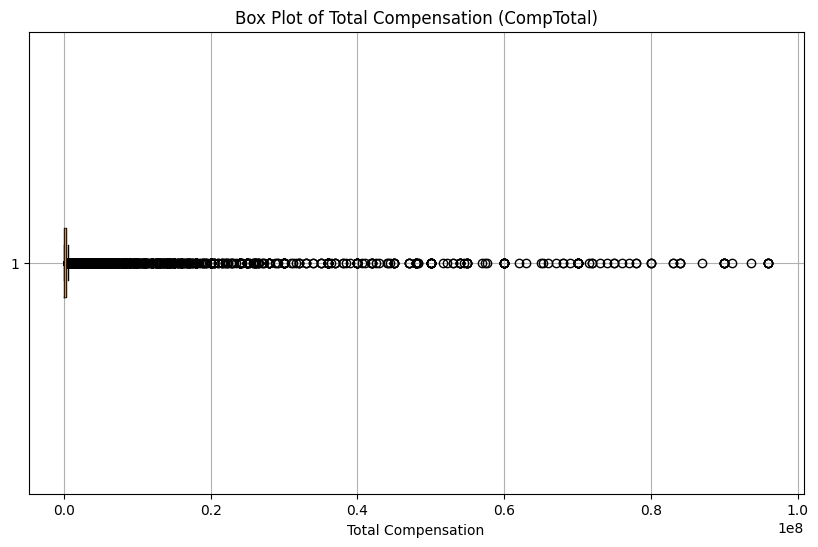

In [4]:
plt.figure(figsize=(10, 6))
plt.boxplot(df['CompTotal'].dropna(), vert=False)
plt.title('Box Plot of Total Compensation (CompTotal)')
plt.xlabel('Total Compensation')
plt.grid(True)
plt.show()


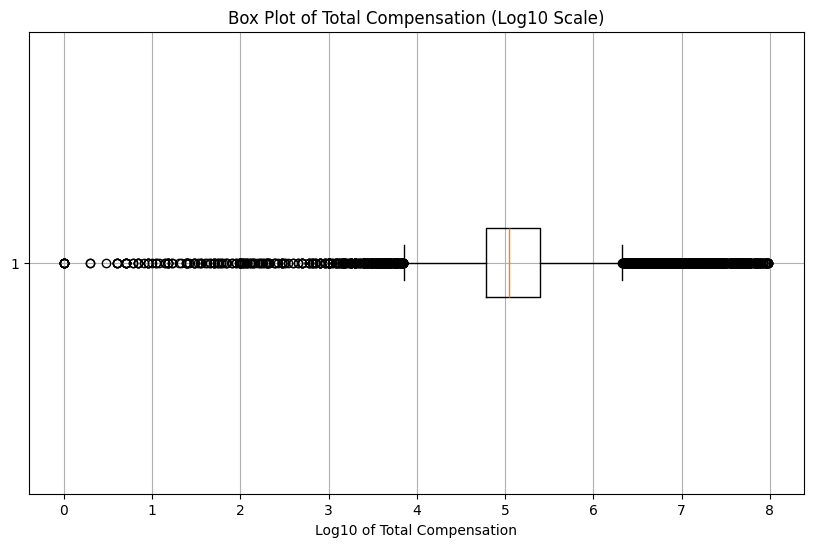

In [5]:
import numpy as np
import matplotlib.pyplot as plt

# Filter out any zero or negative values to avoid log issues
df_filtered = df[df['CompTotal'] > 0]

# Create a box plot with log scale
plt.figure(figsize=(10, 6))
plt.boxplot(np.log10(df_filtered['CompTotal']), vert=False)
plt.title('Box Plot of Total Compensation (Log10 Scale)')
plt.xlabel('Log10 of Total Compensation')
plt.grid(True)
plt.show()


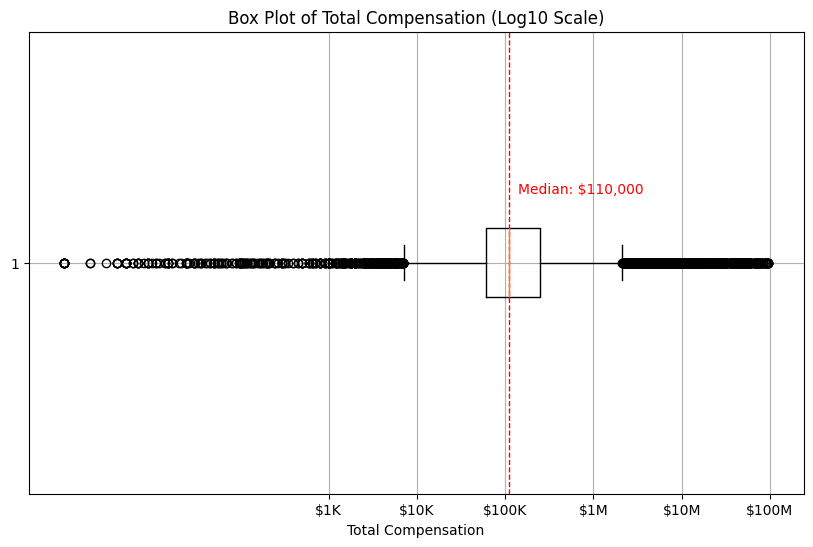

In [6]:
import numpy as np
import matplotlib.pyplot as plt

# Filter out nonpositive values
df_filtered = df[df['CompTotal'] > 0]

# Compute log10 and median
log_comp = np.log10(df_filtered['CompTotal'])
median_val = df_filtered['CompTotal'].median()
median_log = np.log10(median_val)

# Tick positions and labels
ticks = [3, 4, 5, 6, 7, 8]
labels = ['$1K', '$10K', '$100K', '$1M', '$10M', '$100M']

# Create the box plot
plt.figure(figsize=(10, 6))
plt.boxplot(log_comp, vert=False)
plt.xticks(ticks, labels)
plt.title('Box Plot of Total Compensation (Log10 Scale)')
plt.xlabel('Total Compensation')
plt.grid(True)

# Add median annotation with adjustable vertical position
y_position = 1.15  # <-- Increase this value to raise the text higher
plt.text(median_log + 0.1, y_position, f'Median: ${median_val:,.0f}', color='red')
plt.axvline(median_log, color='red', linestyle='--', linewidth=1)

plt.show()



**2. Box Plot of Age (converted to numeric values)**


Convert the `Age` column into numerical values and visualize the distribution.


In [7]:
# your code goes here
# Step 1: Map age ranges to approximate midpoints
age_midpoints = {
    'Under 18 years old': 16,
    '18-24 years old': 21,
    '25-34 years old': 29.5,
    '35-44 years old': 39.5,
    '45-54 years old': 49.5,
    '55-64 years old': 59.5,
    '65 years or older': 70,
    'Prefer not to say': None
}

# Step 2: Create new numeric age column
df['AgeNumeric'] = df['Age'].map(age_midpoints)


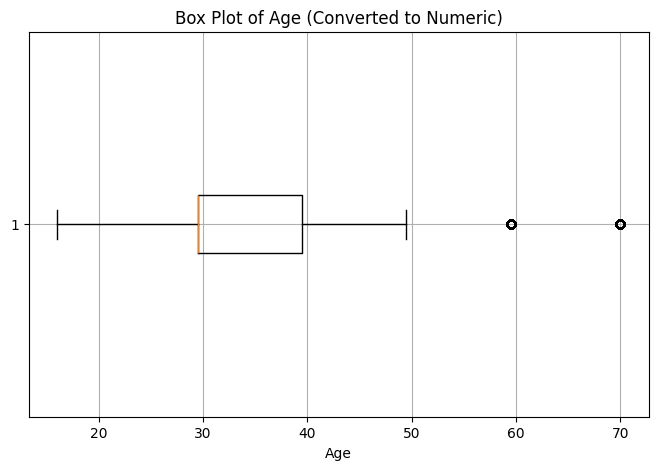

In [8]:
# Drop missing values
age_data = df['AgeNumeric'].dropna()

# Box plot of AgeNumeric
plt.figure(figsize=(8, 5))
plt.boxplot(age_data, vert=False)
plt.title('Box Plot of Age (Converted to Numeric)')
plt.xlabel('Age')
plt.grid(True)
plt.show()

### Task 2: Visualizing Relationships in Data


**1. Box Plot of `CompTotal` Grouped by Age Groups:**


Visualize the distribution of compensation across different age groups.


In [9]:
import seaborn as sns
import matplotlib.pyplot as plt

# Step 1: Create a simplified AgeGroup column
def simplify_age(age):
    if age in ['55-64 years old', '65 years or older']:
        return '55+ years old'
    elif age in ['18-24 years old', '25-34 years old', '35-44 years old', '45-54 years old']:
        return age
    else:
        return None  # exclude 'Under 18' and 'Prefer not to say'

df['AgeGroup'] = df['Age'].apply(simplify_age)

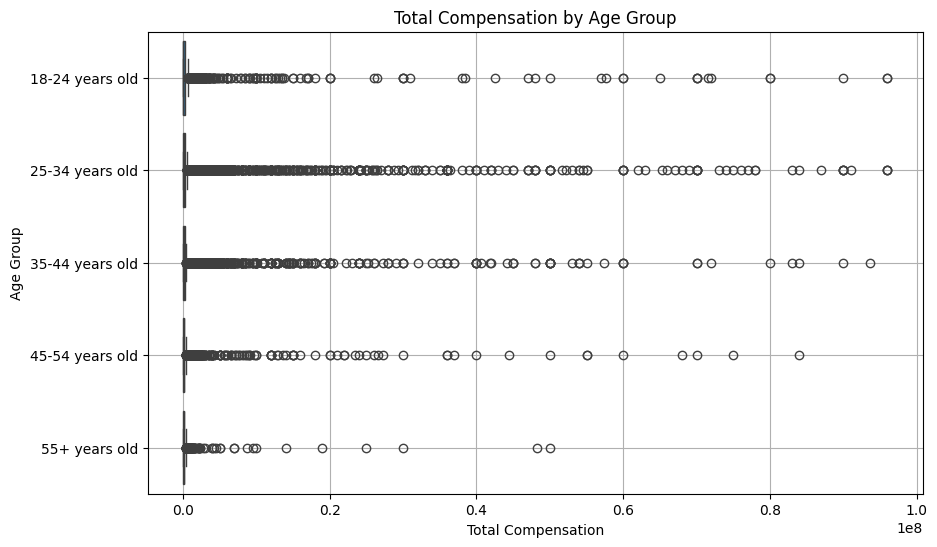

In [10]:
# your code goes here
import seaborn as sns
import matplotlib.pyplot as plt

# Define the correct age group order
age_order = [
    '18-24 years old',
    '25-34 years old',
    '35-44 years old',
    '45-54 years old',
    '55+ years old'
]

# Create the box plot
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='CompTotal', y='AgeGroup', order=age_order)
plt.title('Total Compensation by Age Group')
plt.xlabel('Total Compensation')
plt.ylabel('Age Group')
plt.grid(True)
plt.show()


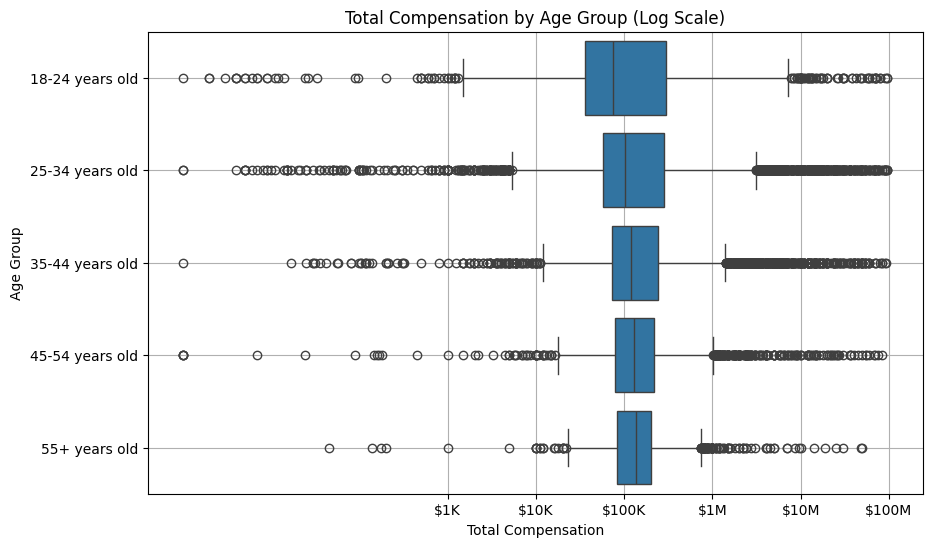

In [11]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Filter out nonpositive compensation values to avoid log10 issues
df_log = df[df['CompTotal'] > 0].copy()
df_log['LogCompTotal'] = np.log10(df_log['CompTotal'])

# Define age group order
age_order = [
    '18-24 years old',
    '25-34 years old',
    '35-44 years old',
    '45-54 years old',
    '55+ years old'
]

# Set up tick marks and labels for log-scaled x-axis
log_ticks = [3, 4, 5, 6, 7, 8]  # corresponds to $1K to $100M
log_labels = ['$1K', '$10K', '$100K', '$1M', '$10M', '$100M']

# Plot using log scale
plt.figure(figsize=(10, 6))
sns.boxplot(data=df_log, x='LogCompTotal', y='AgeGroup', order=age_order)
plt.xticks(ticks=log_ticks, labels=log_labels)
plt.xlabel('Total Compensation')
plt.ylabel('Age Group')
plt.title('Total Compensation by Age Group (Log Scale)')
plt.grid(True)
plt.show()


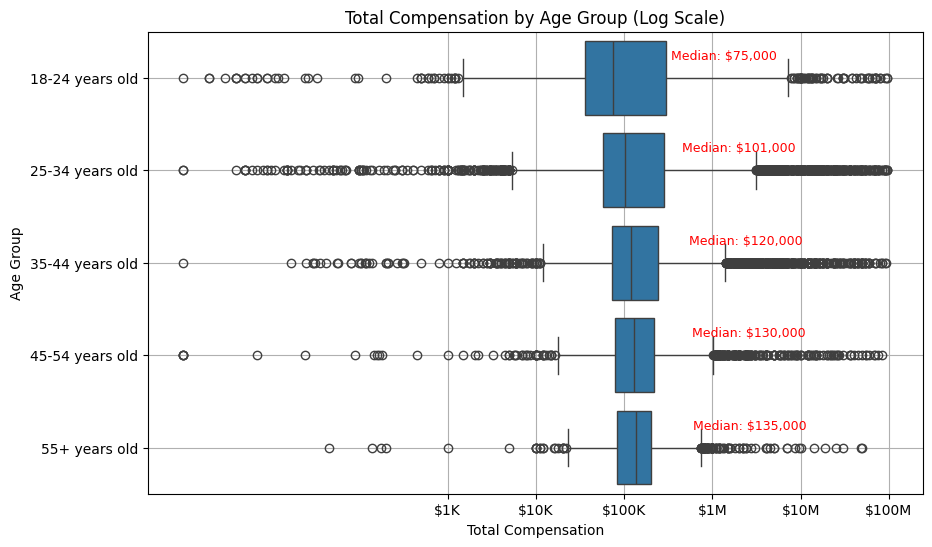

In [12]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Filter out nonpositive values and compute log10
df_log = df[df['CompTotal'] > 0].copy()
df_log['LogCompTotal'] = np.log10(df_log['CompTotal'])

# Define age order
age_order = [
    '18-24 years old',
    '25-34 years old',
    '35-44 years old',
    '45-54 years old',
    '55+ years old'
]

# Create the box plot
plt.figure(figsize=(10, 6))
sns.boxplot(data=df_log, x='LogCompTotal', y='AgeGroup', order=age_order)

# Set log ticks and labels
log_ticks = [3, 4, 5, 6, 7, 8]
log_labels = ['$1K', '$10K', '$100K', '$1M', '$10M', '$100M']
plt.xticks(ticks=log_ticks, labels=log_labels)
plt.xlabel('Total Compensation')
plt.ylabel('Age Group')
plt.title('Total Compensation by Age Group (Log Scale)')
plt.grid(True)

# Annotate medians
y_position_offset = -0.2  # <-- adjust this value if needed
for i, group in enumerate(age_order):
    group_data = df_log[df_log['AgeGroup'] == group]['CompTotal']
    if not group_data.empty:
        median_val = group_data.median()
        median_log = np.log10(median_val)
        plt.text(median_log + 0.65, i + y_position_offset,
                 f'Median: ${median_val:,.0f}', color='red', fontsize=9)

plt.show()


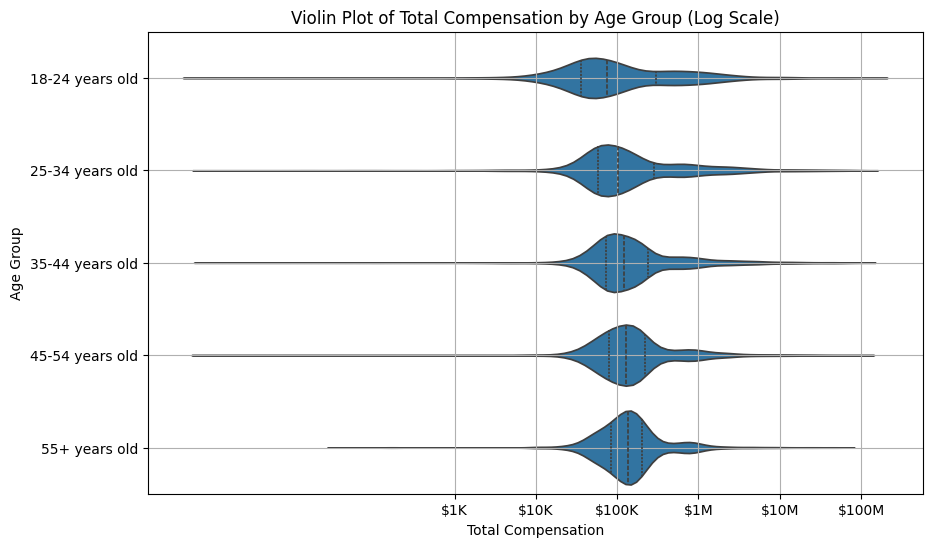

In [13]:
plt.figure(figsize=(10, 6))
sns.violinplot(data=df_log, x='LogCompTotal', y='AgeGroup', order=age_order, inner='quartile')
plt.xticks(ticks=log_ticks, labels=log_labels)
plt.xlabel('Total Compensation')
plt.ylabel('Age Group')
plt.title('Violin Plot of Total Compensation by Age Group (Log Scale)')
plt.grid(True)
plt.show()


/tmp/ipykernel_301/1720858700.py:31: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(


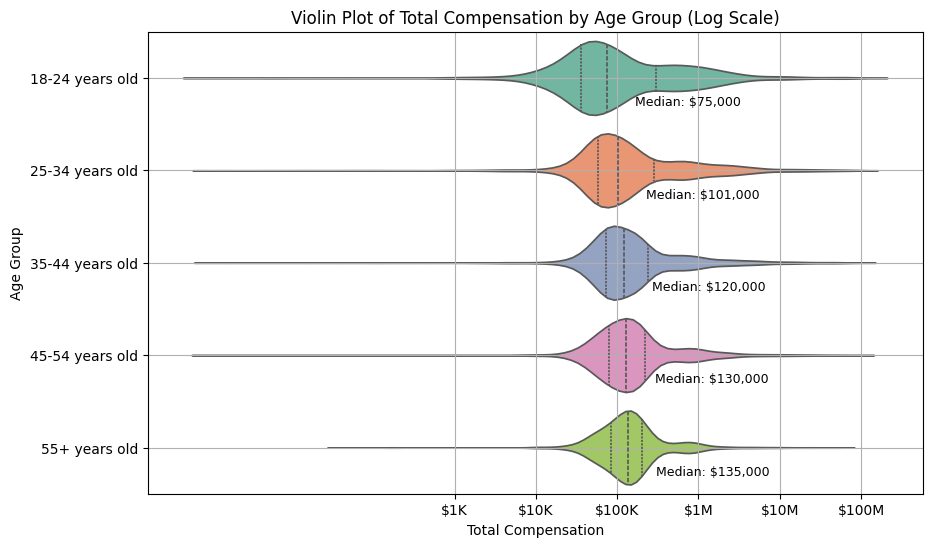

In [14]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Prepare the data
df_log = df[df['CompTotal'] > 0].copy()
df_log['LogCompTotal'] = np.log10(df_log['CompTotal'])

# Age group order and custom color palette
age_order = [
    '18-24 years old',
    '25-34 years old',
    '35-44 years old',
    '45-54 years old',
    '55+ years old'
]
palette = {
    '18-24 years old': '#66c2a5',
    '25-34 years old': '#fc8d62',
    '35-44 years old': '#8da0cb',
    '45-54 years old': '#e78ac3',
    '55+ years old': '#a6d854'
}

# Axis ticks for log scale
log_ticks = [3, 4, 5, 6, 7, 8]
log_labels = ['$1K', '$10K', '$100K', '$1M', '$10M', '$100M']

# Plot violin
plt.figure(figsize=(10, 6))
sns.violinplot(
    data=df_log, x='LogCompTotal', y='AgeGroup',
    order=age_order, palette=palette, inner='quartile'
)
plt.xticks(ticks=log_ticks, labels=log_labels)
plt.xlabel('Total Compensation')
plt.ylabel('Age Group')
plt.title('Violin Plot of Total Compensation by Age Group (Log Scale)')
plt.grid(True)

# Annotate medians
y_offset = 0.3  # <-- adjust this to fine-tune vertical label position
for i, group in enumerate(age_order):
    group_data = df_log[df_log['AgeGroup'] == group]['CompTotal']
    if not group_data.empty:
        median_val = group_data.median()
        median_log = np.log10(median_val)
        plt.text(median_log + 0.35, i + y_offset,
                 f'Median: ${median_val:,.0f}', color='black', fontsize=9)

plt.show()


**2. Box Plot of `CompTotal` Grouped by Job Satisfaction (`JobSatPoints_6`):**


Examine how compensation varies based on job satisfaction levels.


In [15]:
df['JobSat_0to10'] = df['JobSatPoints_6'] / 10
df['JobSatGroup'] = df['JobSat_0to10'].round(0).astype('Int64')  # optional rounding


/tmp/ipykernel_301/1853606457.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_log, x='LogCompTotal', y='JobSatGroup', palette='coolwarm')


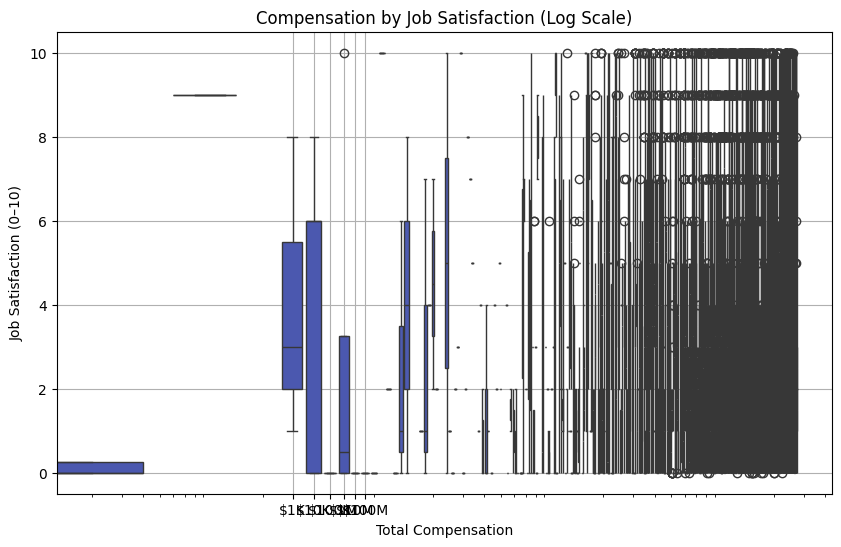

In [16]:
# your code goes here
# Filter and prepare
df_log = df[df['CompTotal'] > 0].copy()
df_log['LogCompTotal'] = np.log10(df_log['CompTotal'])
df_log['JobSatGroup'] = (df_log['JobSatPoints_6'] / 10).round(0).astype('Int64')

# Plot
plt.figure(figsize=(10, 6))
sns.boxplot(data=df_log, x='LogCompTotal', y='JobSatGroup', palette='coolwarm')
plt.xscale('log')

plt.xticks(ticks=[3,4,5,6,7,8], labels=['$1K', '$10K', '$100K', '$1M', '$10M', '$100M'])
plt.xlabel('Total Compensation')
plt.ylabel('Job Satisfaction (0–10)')
plt.title('Compensation by Job Satisfaction (Log Scale)')
plt.grid(True)
plt.show()


/tmp/ipykernel_478/1841712338.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_log, x='LogCompTotal', y='JobSatGroup', palette='coolwarm')


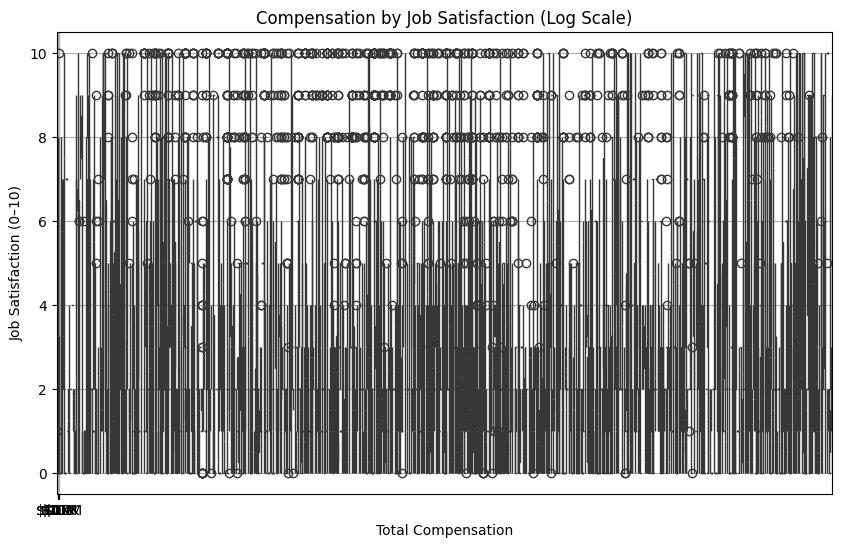

In [48]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=df_log, x='LogCompTotal', y='JobSatGroup', palette='coolwarm')
plt.xticks(ticks=[3, 4, 5, 6, 7, 8], labels=['$1K', '$10K', '$100K', '$1M', '$10M', '$100M'])
plt.xlabel('Total Compensation')
plt.ylabel('Job Satisfaction (0–10)')
plt.title('Compensation by Job Satisfaction (Log Scale)')
plt.grid(True)
plt.show()


In [17]:
# Compute 75th percentile of CompTotal
q3 = df['CompTotal'].quantile(0.75)

# Filter the DataFrame
df_filtered = df[(df['CompTotal'] > 0) & (df['CompTotal'] <= q3)].copy()

# Add log and job satisfaction grouping
df_filtered['LogCompTotal'] = np.log10(df_filtered['CompTotal'])
df_filtered['JobSatGroup'] = (df_filtered['JobSatPoints_6'] / 10).round(0).astype('Int64')



/tmp/ipykernel_301/1041219326.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_filtered, x='LogCompTotal', y='JobSatGroup', palette='coolwarm')


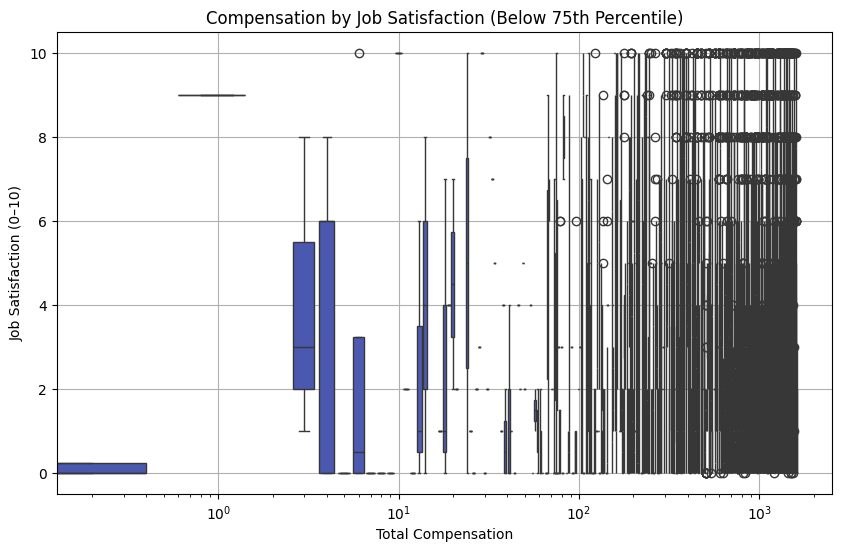

In [18]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=df_filtered, x='LogCompTotal', y='JobSatGroup', palette='coolwarm')

# Clean up x-axis ticks
plt.xticks(
    ticks=[3, 4, 5, 6],  # Adjust to match new visible range
    labels=['$1K', '$10K', '$100K', '$1M']
)
plt.xscale('log')
plt.xlabel('Total Compensation')
plt.ylabel('Job Satisfaction (0–10)')
plt.title('Compensation by Job Satisfaction (Below 75th Percentile)')
plt.grid(True)
plt.show()


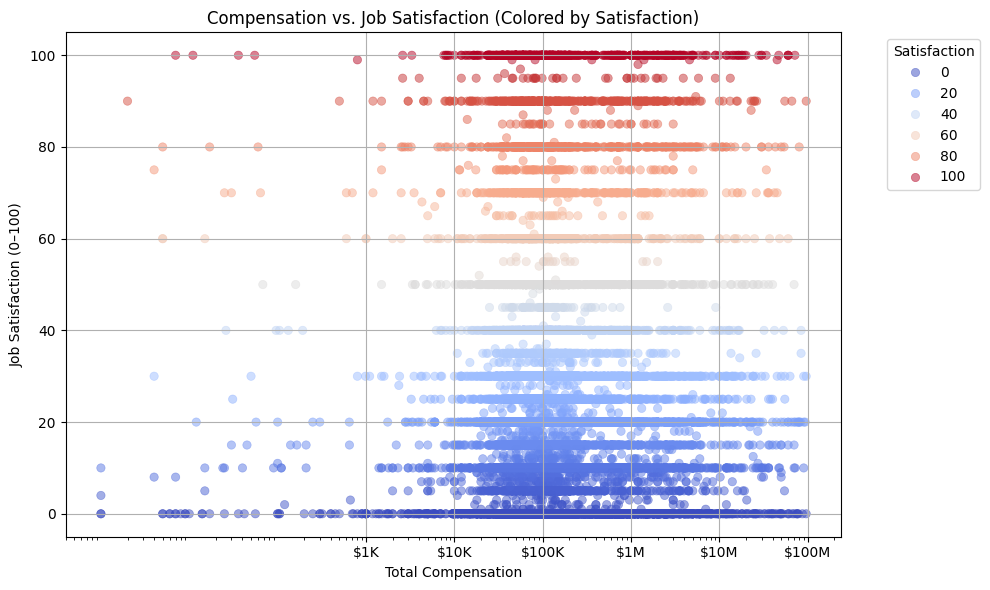

In [19]:
plt.figure(figsize=(10, 6))
sns.scatterplot(
    data=df[df['CompTotal'] > 0].copy(),
    x='CompTotal',
    y='JobSatPoints_6',
    hue='JobSatPoints_6',
    palette='coolwarm',
    alpha=0.5,
    edgecolor=None
)
plt.xscale('log')
plt.xticks(
    ticks=[1e3, 1e4, 1e5, 1e6, 1e7, 1e8],
    labels=['$1K', '$10K', '$100K', '$1M', '$10M', '$100M']
)
plt.xlabel('Total Compensation')
plt.ylabel('Job Satisfaction (0–100)')
plt.title('Compensation vs. Job Satisfaction (Colored by Satisfaction)')
plt.grid(True)
plt.legend(title='Satisfaction', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


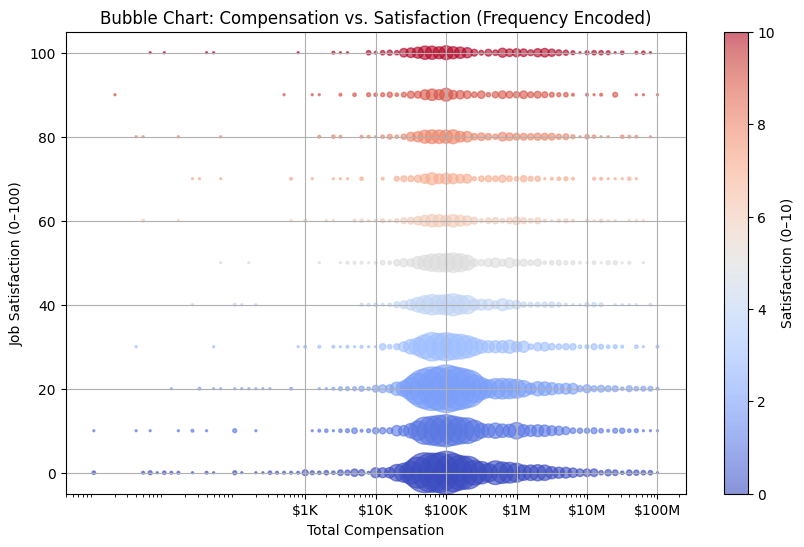

In [20]:
# Bin compensation into log buckets to reduce uniqueness
df_bubble = df[df['CompTotal'] > 0].copy()
df_bubble['CompBin'] = (np.log10(df_bubble['CompTotal'])).round(1)
df_bubble['SatBin'] = (df_bubble['JobSatPoints_6'] / 10).round(0)

# Count combinations
bubble_data = df_bubble.groupby(['CompBin', 'SatBin']).size().reset_index(name='Count')

# Plot
plt.figure(figsize=(10, 6))
plt.scatter(
    x=10**bubble_data['CompBin'],
    y=bubble_data['SatBin'] * 10,
    s=bubble_data['Count'] * 2,  # Scale bubble size
    alpha=0.6,
    c=bubble_data['SatBin'],
    cmap='coolwarm'
)
plt.xscale('log')
plt.xticks([1e3, 1e4, 1e5, 1e6, 1e7, 1e8], ['$1K', '$10K', '$100K', '$1M', '$10M', '$100M'])
plt.xlabel('Total Compensation')
plt.ylabel('Job Satisfaction (0–100)')
plt.title('Bubble Chart: Compensation vs. Satisfaction (Frequency Encoded)')
plt.grid(True)
plt.colorbar(label='Satisfaction (0–10)')
plt.show()


### Summary: Compensation by Job Satisfaction – Visualization Process and Insights

#### What Was Done

* Explored how compensation (`CompTotal`) varies with job satisfaction (`JobSatPoints_6`, 0–100 scale).
* Rescaled job satisfaction to a 0–10 grouping (`JobSatGroup`) for interpretability.
* Attempted multiple plot types to visualize the relationship, starting with **box plots** and **violin plots**.

#### Issues Encountered

* **Box Plot Challenges**:

  * Extreme compensation outliers heavily skewed the x-axis.
  * Even with log scaling and filtering to the 75th percentile, the plots remained dense and unreadable due to overlapping whiskers and outliers.
* **Violin Plot Limitations**:

  * Very slow to render due to the high cardinality and volume of unique data points.
  * Resulted in a noisy, uninformative plot even after grouping satisfaction scores.

#### Why Bubble Chart Was Chosen for Visualization

* **Aggregated the data** into log-scaled salary bins and rounded satisfaction scores.
* **Visualized frequency** of each (salary, satisfaction) pair using bubble **size**.
* **Used color** to reflect satisfaction level, adding a third visual dimension.
* The resulting plot:

  * Showed clear patterns in compensation distribution by satisfaction level.
  * Revealed that satisfaction increases are more concentrated at compensation levels between \$100K and \$200K.
  * Helped distinguish between rare and common combinations, which box/violin plots obscure.

#### Insights from the Bubble Chart

* Satisfaction scores span the full 0–100 range at nearly all compensation levels, suggesting compensation alone does not determine satisfaction.
* The highest concentrations of **high satisfaction (scores 8–10)** appear between **\$75K–\$200K**.
* A significant number of **low satisfaction scores (0–2)** also occur in the \$50K–\$150K range — likely representing dissatisfaction despite market-rate pay.

#### Conclusion

The bubble chart provided a more meaningful, scalable, and interpretable visualization for this dataset than the originally suggested box plot. It captured both distribution and density, offering nuanced insights into how job satisfaction and compensation relate.

---

### Task 3: Visualizing the Composition of Data


**1. Box Plot of `ConvertedCompYearly` for the Top 5 Developer Types:**


Analyze compensation across the top 5 developer roles.


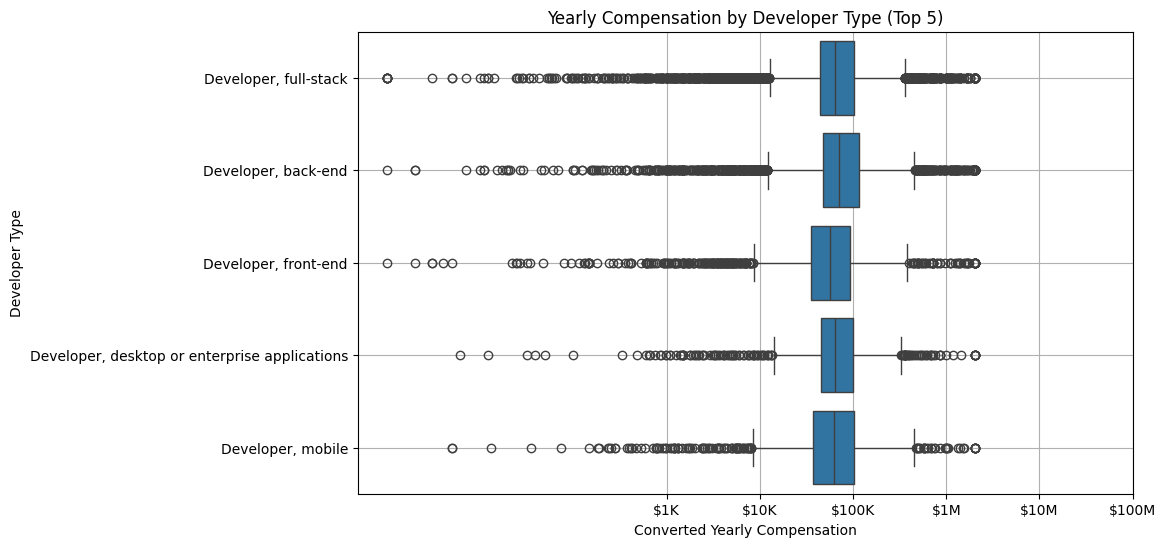

In [21]:
# your code goes here
# Get top 5 most common developer types
top5_dev_types = df['DevType'].value_counts().head(5).index

# Filter for only those top developer types
df_top_dev = df[df['DevType'].isin(top5_dev_types)].copy()

# Drop rows with missing compensation
df_top_dev = df_top_dev[df_top_dev['ConvertedCompYearly'] > 0]

# Log-transform compensation for readability
df_top_dev['LogCompYearly'] = np.log10(df_top_dev['ConvertedCompYearly'])

# Plot
plt.figure(figsize=(10, 6))
sns.boxplot(data=df_top_dev, x='LogCompYearly', y='DevType', order=top5_dev_types)
plt.xticks(
    ticks=[3, 4, 5, 6, 7, 8],
    labels=['$1K', '$10K', '$100K', '$1M', '$10M', '$100M']
)
plt.xlabel('Converted Yearly Compensation')
plt.ylabel('Developer Type')
plt.title('Yearly Compensation by Developer Type (Top 5)')
plt.grid(True)
plt.show()


**2. Box Plot of `CompTotal` for the Top 5 Countries:**


Analyze compensation across respondents from the top 5 countries.


In [23]:
country_mapping = {
    'United States of America': 'USA',
    'United Kingdom of Great Britain and Northern Ireland': 'UK and N. Ireland',
    'Iran, Islamic Republic of...': 'Iran',
    'Hong Kong (S.A.R.)': 'Hong Kong',
    'Venezuela, Bolivarian Republic of...': 'Venezuela',
    'Democratic People\'s Republic of Korea': 'North Korea',
    'Republic of Korea': 'South Korea',
    'Russian Federation': 'Russia',
    'Lao People\'s Democratic Republic': 'Laos',
    'Syrian Arab Republic': 'Syria',
    'United Republic of Tanzania': 'Tanzania',
    'Republic of Moldova': 'Moldova',
    'Palestinian Territory': 'Palestine',
    'Micronesia, Federated States of...': 'Micronesia',
    'Congo, Republic of the...': 'Congo',
    'Democratic Republic of the Congo': 'DR Congo',
    'Bosnia and Herzegovina': 'Bosnia',
    'Libyan Arab Jamahiriya': 'Libya',
    'Bolivia, Plurinational State of...': 'Bolivia'
}

# Apply the mapping
df['Country'] = df['Country'].replace(country_mapping)

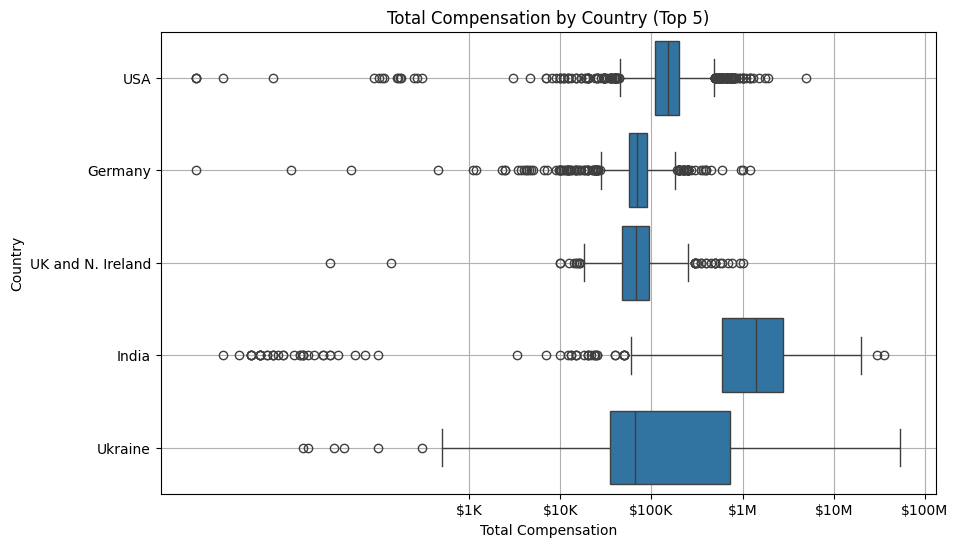

In [24]:
# your code goes here
# Get top 5 most common countries
top5_countries = df['Country'].value_counts().head(5).index

# Filter and clean
df_top_countries = df[df['Country'].isin(top5_countries)].copy()
df_top_countries = df_top_countries[df_top_countries['CompTotal'] > 0]
df_top_countries['LogCompTotal'] = np.log10(df_top_countries['CompTotal'])

# Plot
plt.figure(figsize=(10, 6))
sns.boxplot(data=df_top_countries, x='LogCompTotal', y='Country', order=top5_countries)
plt.xticks(
    ticks=[3, 4, 5, 6, 7, 8],
    labels=['$1K', '$10K', '$100K', '$1M', '$10M', '$100M']
)
plt.xlabel('Total Compensation')
plt.ylabel('Country')
plt.title('Total Compensation by Country (Top 5)')
plt.grid(True)
plt.show()


### Task 4: Visualizing Comparison of Data


**1. Box Plot of CompTotal Across Employment Types:**


Analyze compensation for different employment types.


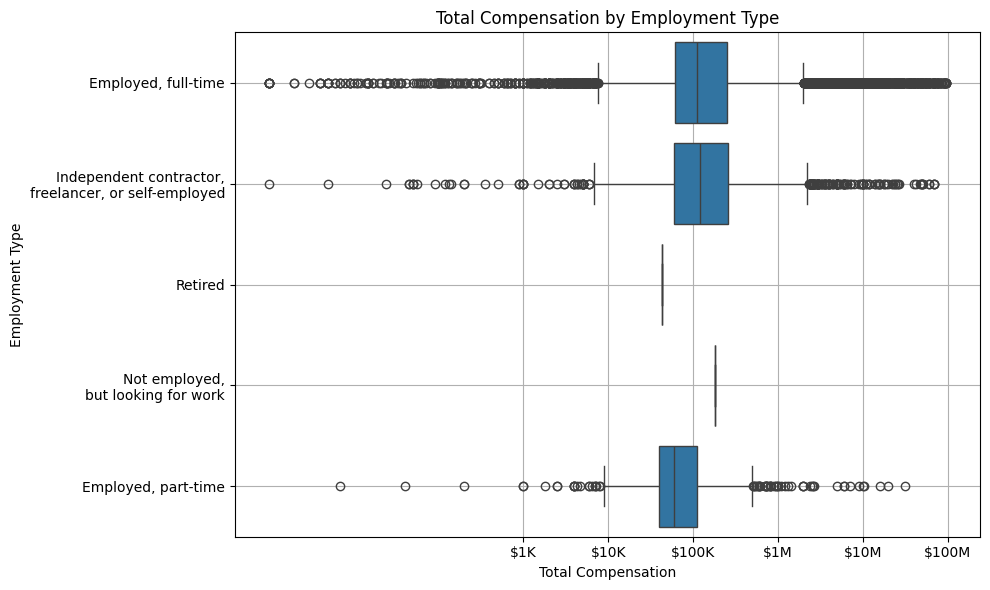

In [29]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Filter for valid compensation
df_emp = df[df['CompTotal'] > 0].copy()
df_emp['LogCompTotal'] = np.log10(df_emp['CompTotal'])

# Define top 5 employment types (original values)
top_employment = [
    'Employed, full-time',
    'Independent contractor, freelancer, or self-employed',
    'Retired',
    'Not employed, but looking for work',
    'Employed, part-time'
]

# Filter DataFrame to include only these types
df_emp = df_emp[df_emp['Employment'].isin(top_employment)]

# Define wrapped labels for y-axis
label_wrapped = [
    'Employed, full-time',
    'Independent contractor,\nfreelancer, or self-employed',
    'Retired',
    'Not employed,\nbut looking for work',
    'Employed, part-time'
]

# Plot
plt.figure(figsize=(10, 6))
sns.boxplot(data=df_emp, x='LogCompTotal', y='Employment', order=top_employment)

# Apply wrapped labels
plt.yticks(ticks=range(len(label_wrapped)), labels=label_wrapped)

# Log-scale x-axis labels (custom ticks)
plt.xticks(
    ticks=[3, 4, 5, 6, 7, 8],
    labels=['$1K', '$10K', '$100K', '$1M', '$10M', '$100M']
)

plt.xlabel('Total Compensation')
plt.ylabel('Employment Type')
plt.title('Total Compensation by Employment Type')
plt.grid(True)
plt.tight_layout()
plt.show()


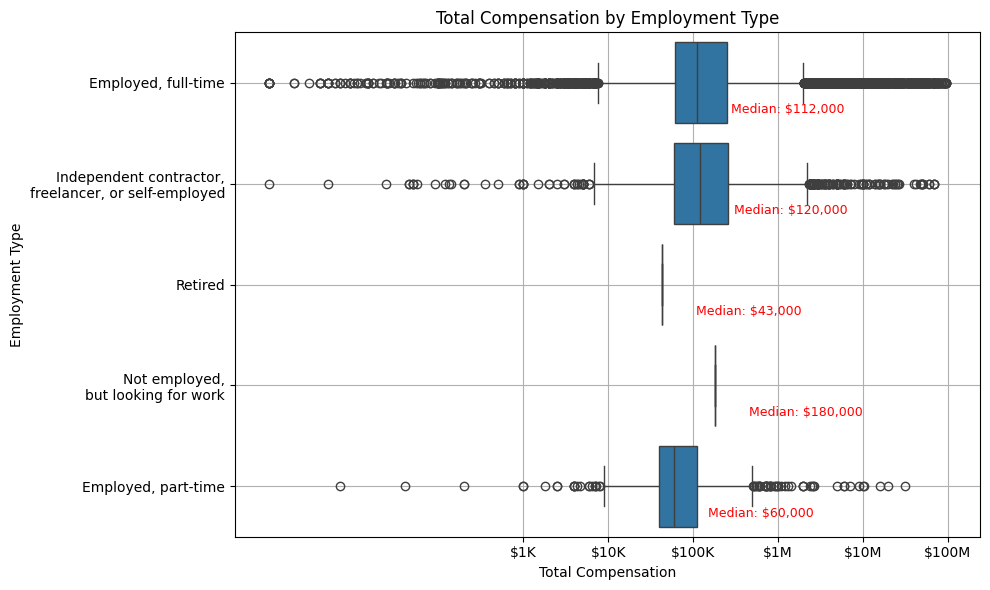

In [35]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Filter for valid compensation
df_emp = df[df['CompTotal'] > 0].copy()
df_emp['LogCompTotal'] = np.log10(df_emp['CompTotal'])

# Define top 5 employment types (original values)
top_employment = [
    'Employed, full-time',
    'Independent contractor, freelancer, or self-employed',
    'Retired',
    'Not employed, but looking for work',
    'Employed, part-time'
]

# Filter DataFrame
df_emp = df_emp[df_emp['Employment'].isin(top_employment)]

# Wrapped labels for display
label_wrapped = [
    'Employed, full-time',
    'Independent contractor,\nfreelancer, or self-employed',
    'Retired',
    'Not employed,\nbut looking for work',
    'Employed, part-time'
]

# Plot setup
plt.figure(figsize=(10, 6))
sns.boxplot(data=df_emp, x='LogCompTotal', y='Employment', order=top_employment)

# Apply wrapped y-axis labels
plt.yticks(ticks=range(len(label_wrapped)), labels=label_wrapped)

# Set x-ticks to display dollar amounts
plt.xticks(
    ticks=[3, 4, 5, 6, 7, 8],
    labels=['$1K', '$10K', '$100K', '$1M', '$10M', '$100M']
)

plt.xlabel('Total Compensation')
plt.ylabel('Employment Type')
plt.title('Total Compensation by Employment Type')
plt.grid(True)

# Add median lines and annotations
y_offset = 0.3  # <-- adjust this to move text up/down
for i, emp_type in enumerate(top_employment):
    comp_vals = df_emp[df_emp['Employment'] == emp_type]['CompTotal']
    if not comp_vals.empty:
        median_val = comp_vals.median()
        median_log = np.log10(median_val)
        # Vertical line at median
        #plt.axvline(median_log, color='red', linestyle='--', linewidth=1)
        # Annotation
        plt.text(median_log + 0.4, i + y_offset,
                 f'Median: ${median_val:,.0f}', color='red', fontsize=9)

plt.tight_layout()
plt.show()


**2. Box Plot of `YearsCodePro` by Job Satisfaction (`JobSatPoints_6`):**


Examine the distribution of professional coding years by job satisfaction levels.


/tmp/ipykernel_301/195557265.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_years, x='YearsCodePro', y='JobSatGroup', palette='coolwarm')


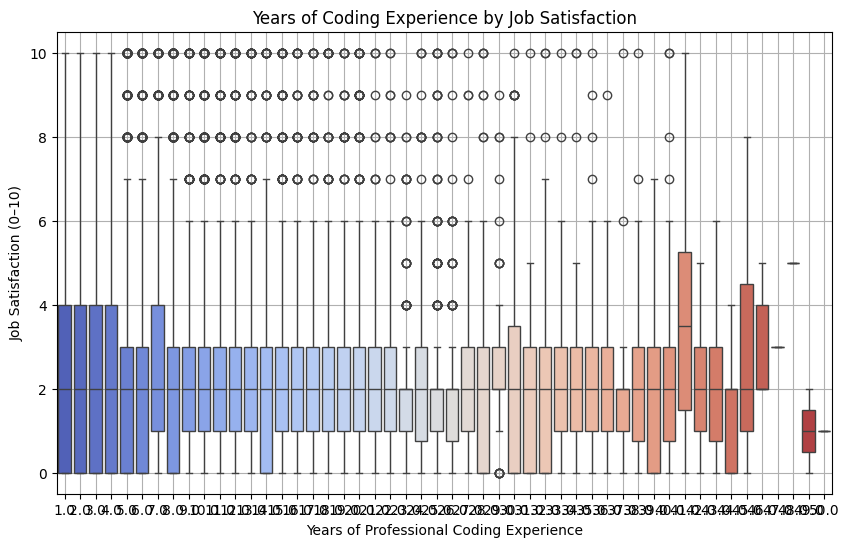

In [36]:
# your code goes here
# Clean YearsCodePro and satisfaction
df_years = df.copy()
df_years = df_years[df_years['YearsCodePro'].notna()]
df_years['YearsCodePro'] = pd.to_numeric(df_years['YearsCodePro'], errors='coerce')
df_years['JobSatGroup'] = (df_years['JobSatPoints_6'] / 10).round(0).astype('Int64')

# Plot
plt.figure(figsize=(10, 6))
sns.boxplot(data=df_years, x='YearsCodePro', y='JobSatGroup', palette='coolwarm')
plt.xlabel('Years of Professional Coding Experience')
plt.ylabel('Job Satisfaction (0–10)')
plt.title('Years of Coding Experience by Job Satisfaction')
plt.grid(True)
plt.show()


/tmp/ipykernel_301/3390113253.py:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_years, x='ExperienceBin', y='JobSatGroup', palette='coolwarm')


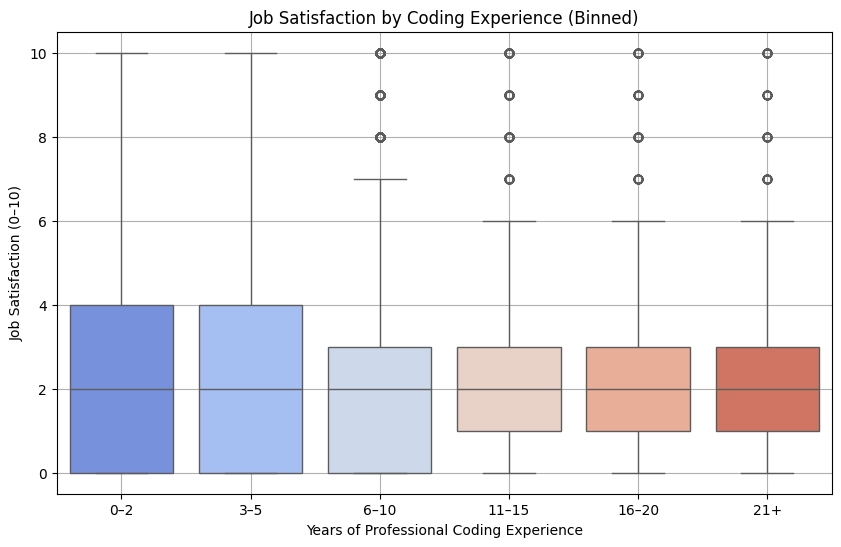

In [37]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Prepare data
df_years = df.copy()
df_years = df_years[df_years['YearsCodePro'].notna()]
df_years['YearsCodePro'] = pd.to_numeric(df_years['YearsCodePro'], errors='coerce')
df_years['JobSatGroup'] = (df_years['JobSatPoints_6'] / 10).round(0).astype('Int64')

# Bin years of experience
bins = [0, 2, 5, 10, 15, 20, float('inf')]
labels = ['0–2', '3–5', '6–10', '11–15', '16–20', '21+']
df_years['ExperienceBin'] = pd.cut(df_years['YearsCodePro'], bins=bins, labels=labels, right=True)

# Drop rows with missing bins
df_years = df_years[df_years['ExperienceBin'].notna()]

# Plot
plt.figure(figsize=(10, 6))
sns.boxplot(data=df_years, x='ExperienceBin', y='JobSatGroup', palette='coolwarm')
plt.xlabel('Years of Professional Coding Experience')
plt.ylabel('Job Satisfaction (0–10)')
plt.title('Job Satisfaction by Coding Experience (Binned)')
plt.grid(True)
plt.show()


### Lab Summary: Visualizing Compensation and Satisfaction Data

#### **Overview**

This lab focused on using data visualizations to explore trends and relationships in compensation, professional experience, and job satisfaction. A variety of plot types were used, each chosen to suit the structure and scale of the data.

---

### **What Was Done**

#### **1. Distribution of Compensation**

* Created box plots of `CompTotal` to visualize the overall distribution and outliers.
* Applied **log10 transformation** to handle extreme right-skew in compensation values.
* Added **median lines and labels** to clarify central tendency.

#### **2. Compensation by Age Group**

* Simplified `Age` into grouped categories.
* Used a **violin plot with log-scaled compensation** to show distribution shapes.
* Annotated median salaries to highlight compensation shifts with age.

#### **3. Compensation by Job Satisfaction**

* Initially attempted a box plot grouped by `JobSatPoints_6`, but this was cluttered and slow to render.
* Switched to a **bubble chart**, which proved more effective.

  * Compensation and satisfaction were binned.
  * Bubble **size** encoded frequency, and **color** indicated satisfaction level.
  * This provided a clear, data-dense alternative to violin plots.

#### **4. Compensation by Developer Type and Country**

* Used box plots with log scaling to compare the top 5 most common:

  * Developer roles (`ConvertedCompYearly`)
  * Countries (`CompTotal`)
* Helped reveal disparities between roles and geographic regions.

#### **5. Compensation by Employment Type**

* Displayed log-transformed box plots for top 5 employment types.
* Wrapped long y-axis labels for readability.
* Annotated with red **median salary lines** and labels for clarity.

#### **6. Coding Experience vs. Job Satisfaction**

* Original scatter of `YearsCodePro` was too granular for visual clarity.
* Binned experience into six ranges: `0–2`, `3–5`, ..., `21+` years.
* Created a clean box plot showing how satisfaction trends across experience levels.

---

### **Key Insights**

* **Compensation** varies significantly with **age**, **developer type**, and **employment status**.
* **Job satisfaction** does not correlate strongly with higher salaries at extreme levels, as seen in the bubble chart.
* **Part-time and freelance workers** showed more variability and lower median compensation than full-time employees.
* **More years of experience** does **not** consistently predict higher satisfaction — in fact, satisfaction slightly declines over time in many cases.
* Visualization choice is crucial: the **bubble chart** revealed trends that box and violin plots could not, especially in high-density data.

---


### Final Step: Close the Database Connection


After completing the lab, close the connection to the SQLite database:


In [ ]:
conn.close()

## Summary


In this lab, you used box plots to visualize various aspects of the dataset, focusing on:

- Visualize distributions of compensation and age.

- Explore relationships between compensation, job satisfaction, and professional coding experience.

- Analyze data composition across developer roles and countries.

- Compare compensation across employment types and satisfaction levels.

Box plots provided clear insights into the spread, outliers, and central tendencies of various features in the dataset.


## Authors:
Ayushi Jain


### Other Contributors:
- Rav Ahuja
- Lakshmi Holla
- Malika


<!--## Change Log
|Date (YYYY-MM-DD)|Version|Changed By|Change Description|
|-|-|-|-|               
|2024-10-07|1.2|Madhusudan Moole|Reviewed and updated lab|                                                                                      
|2024-10-06|1.0|Raghul Ramesh|Created lab|-->


Copyright © IBM Corporation. All rights reserved.
